In [23]:
import katpoint
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator, MultipleLocator
from matplotlib.font_manager import FontProperties
from astropy.time import Time

In [24]:
markers = []
colors = ['b','g','r','c','m','y','k']
pointtypes = ['o','*']
for point in  pointtypes:
    for color in colors:
        markers.append(str(color+point))
start_time = '2018-06-17 06:00' 

In [72]:
cat = katpoint.Catalogue(add_specials=True)
cat.remove('Zenith')
cat.remove('Sun')
stars = np.array(katpoint.Catalogue(add_stars=True))
cat.add((stars[30:32]))

Moon is above 10 degrees between LST 4.13 and 14.76 
Mercury is above 10 degrees between LST 2.23 and 2.09 
Venus is above 10 degrees between LST 3.33 and 13.66 
Mars is above 10 degrees between LST 15.67 and 2.09 
Jupiter is above 10 degrees between LST 9.65 and 20.08 
Saturn is above 10 degrees between LST 13.36 and 23.69 
Uranus is above 10 degrees between LST 2.23 and 2.09 
Neptune is above 10 degrees between LST 2.23 and 2.09 
Betelgeuse is above 10 degrees between LST 2.23 and 2.09 
Canopus is above 10 degrees between LST 2.23 and 2.09 


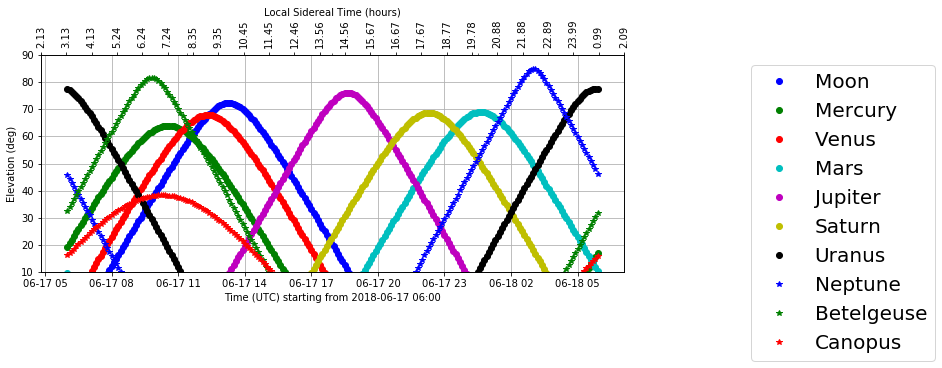

In [73]:
cat.antenna = katpoint.Antenna('Longonot, -1.018793, 36.497053, 1714.3')  
target = cat.targets[0]
t = katpoint.Timestamp(start_time).secs + np.arange(0, 24. * 60. * 60., 360.)
lst = katpoint.rad2deg(target.antenna.local_sidereal_time(t)) / 15

fig, ax1 = plt.subplots()
fig.set_size_inches(12, 4)
plt.subplots_adjust(right=0.8)
lines = list()
labels = list()
count = 0
fontP = FontProperties()
fontP.set_size('small')

for target in cat.targets:
    count = count + 1
    elev = katpoint.rad2deg(target.azel(t)[1])
    timestamps = Time(t, format='unix')
    myplot= plt.plot_date(timestamps.datetime,elev, markers[count-1], linewidth = 0, label=target.name)
    lines.append(myplot)
    labels.append(target.name)
    lst_rise = lst[np.where(elev>10)[0][1]]
    lst_set = lst[np.where(elev>10)[0][-1]]
    print('%s is above 10 degrees between LST %.2f and %.2f '%(target.name, lst_rise, lst_set))
    
        
    
plt.ylim(10,90)
plt.grid()
plt.legend(bbox_to_anchor=(1.2, 1), fontsize=20)
plt.ylabel('Elevation (deg)')
plt.xlabel ('Time (UTC) starting from %s'%start_time)
ax2 = ax1.twiny()
ax2.xaxis.set_major_locator(MaxNLocator(15))
minorLocator = MultipleLocator(0.25)
ax2.xaxis.set_minor_locator(minorLocator)
new_ticks = plt.xticks(
    np.linspace(0,1,24),
    np.round(lst[np.linspace(1, len(lst), num=24, dtype = int)-1], 2),
    rotation = 'vertical')
plt.xlabel('Local Sidereal Time (hours)')
image_filename = 'longonot_source_elevation'
plt.savefig(image_filename)